# Air Quality Data from the State of São Paulo (Brazil): a Tutorial

## Introduction

Air pollution is one of the most pressing issues of our time. The World Health Organization estimates that air pollution is responsible for roughly [4.2 million deaths](https://www.who.int/health-topics/air-pollution#tab=tab_1) every year, and research has shown that approximately [100,000](http://www.saudeesustentabilidade.org.br/site/wp-content/uploads/2013/09/Documentofinaldapesquisapadrao_2409-FINAL-sitev1.pdf) of those deaths take place in the state of São Paulo (Brazil).

Given the severity of this issue, high quality data on air pollution and other environmental parameters have become a tool of paramount importance for policymakers and civilians alike. Our goal in this tutorial is twofold:

1. To empower the reader with the ability to easily collect and process air quality data;
2. To give the reader a comprehensive summary of the data that are available for the state of São Paulo.

What you'll need for this tutorial:

1. A computer with a stable internet connection;
2. A `Python 3` distribution installed on your computer. If you haven't already got one, we highly recommend the [Anaconda](https://www.anaconda.com/) distribution.
3. Finally, since the module we present depends on `tabula-java`, you'll have to download [Java](https://www.java.com/en/download/) as well.

## Collecting and Cleaning the Data

**Background Information.** The state of São Paulo monitors air quality parameters through its own environmental agency, the *Companhia Ambiental do Estado de São Paulo* (CETESB), which in its turn has several measurement stations spread across the state. For the purposes of this tutorial, all we need to know is that CETESB makes its air quality measurements available on the eponymous QUALAR system.

**Collecting the Raw Data.** Any Brazilian citizen (*i.e.*, anyone with the equivalent of a social security number) can sign up for an account on the QUALAR system. All they have to do is:

1. Sign in after registering for an account.
2. Click on `Relatórios > Mensal Dados Horários` and choose the parameters and stations they want to look at.

This deceptively simple procedure can take up to two hours if this is your first time doing it, so we spare the reader and provide all of the PDF files on a [Google Drive folder](https://drive.google.com/drive/folders/10UZFkmitHKetvlJW4qTlOY8Q_wSy7HSJ?usp=sharing) (last updated on January 7, 2021).

The final preparation step requires converting the `pdf` files to `csv` files. We are currently developing a `Python 3` module to make this step as smooth as can be, and the reader who would like to know more about how the sausage is made can look at the GitHub repository with the scripts and a sample `pdf` file. An example of our module (tentatively named `pager`) at work is given below, with the Pinheiros station used for illustration purposes:

In [1]:
import os

os.chdir('/home/tiago/Downloads/stations/')

import pandas as pd
pd.set_option('display.max_columns', None)

from tabula import read_pdf
from pager import clean

pinheiros_raw = read_pdf('Pinheiros/document.pdf', pages=1, lattice=True, silent=True)

pinheiros = clean(pinheiros_raw, 1)

pinheiros.sample(5)

,station,pollutant,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-07,Pinheiros,MP10,2.0,8.0,6.0,9.0,9.0,12.0,15.0,20.0,16.0,47.0,32.0,27.0,38.0,34.0,27.0,22.0,13.0,21.0,2.0,10.0,3.0,14.0,16.0,34.0
2017-01-09,Pinheiros,MP10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,10.0,22.0,25.0,30.0,29.0,22.0,26.0,33.0,26.0,11.0,9.0,6.0
2017-01-13,Pinheiros,MP10,10.0,13.0,13.0,13.0,11.0,10.0,15.0,9.0,6.0,10.0,13.0,9.0,13.0,14.0,20.0,25.0,27.0,20.0,33.0,21.0,9.0,14.0,18.0,10.0
2017-01-31,Pinheiros,MP10,17.0,21.0,24.0,21.0,23.0,19.0,22.0,25.0,21.0,31.0,32.0,30.0,31.0,35.0,22.0,28.0,27.0,29.0,21.0,18.0,24.0,19.0,10.0,10.0
2017-01-18,Pinheiros,MP10,12.0,9.0,3.0,7.0,6.0,6.0,11.0,13.0,19.0,32.0,15.0,22.0,29.0,2.0,16.0,2.0,14.0,12.0,15.0,18.0,23.0,25.0,26.0,24.0


Our module is currently in its early development stages, and can only convert one page at a time. Our temporary way of circumventing this problem is to use the `convert` function (also available on the GitHub repository) for multipage conversions. It typically takes no less than 90 minutes of real time (as measured by the Unix `time` command) for it to clean the entirety of the dataset, so we once again omit the details here to spare the reader.

## Intraday Measurements

The data come in `pdf` files, each of which has one page corresponding to one month of measurements at a particular station for a particular paramenter. Despite the tens of thousands of pages in total, our data is in fact easy to describe:

|  Variable |                Description               |
|:---------:|:----------------------------------------:|
|    date   | Day of measurement in YYYY-MM-DD format. |
|  station  |        Measurement station's name.       |
| pollutant |     Environnmental parameter's name.     |

The remaining columns are all of the form $h_i$, where $i \in \{0, 1, ..., 23\}$ represents the hour of day when the measurement was registered. We can now plot what the average day looks like for the Pinheiros station in terms of PM10 concentration (for the January of 2017):

<AxesSubplot:title={'center':'Typical (Mean) Day (PM10)'}, ylabel='$\\mu g/m^3$'>

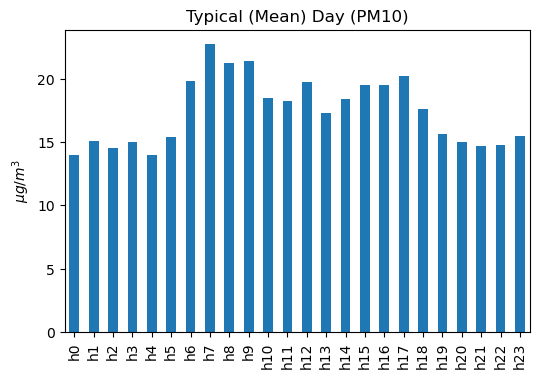

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

pinheiros.groupby(by=['station', 'pollutant']).mean().iloc[0].plot(kind='bar', title='Typical (Mean) Day (PM10)', ylabel='$\mu g/m^3$')

It might be more interesting to look at peak concentration levels, since the majority of symptoms related to pollution only arise in the presence of high levels of particulate matter/ozone/etc.

<AxesSubplot:title={'center':'Typical (Mean) Day (PM10)'}, ylabel='$\\mu g/m^3$'>

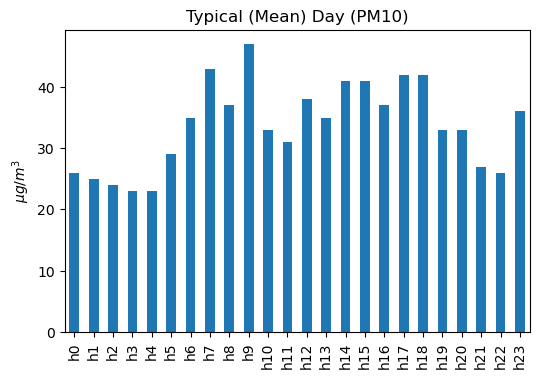

In [3]:
pinheiros.groupby(by=['station', 'pollutant']).max().iloc[0].plot(kind='bar', title='Typical (Mean) Day (PM10)', ylabel='$\mu g/m^3$')

## The Full Dataset

As we have already pointed out, it takes a long time ($\sim 90$ minutes) to generate the full dataset, so we have preëmptively run the `convert.py` code to spare the reader. This dataset is also available on our public [Google Drive folder](https://drive.google.com/file/d/1ADiSHWmmRKqivEMCP9oqVTWq1NyfgtzX/view?usp=sharing), and replication at this point is trivial. A short snippet to sample five observations at random from the full dataset is presented below:

In [4]:
full = pd.read_csv('stations.csv', sep=';')

full.sample(5)

,date,station,pollutant,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
157811,2020-04-11,Santos-Ponta da Praia,DVG,42.0,15.0,23.0,6.0,11.0,33.0,22.0,15.0,12.0,290.0,210.0,197.0,174.0,133.0,138.0,189.0,193.0,206.0,188.0,155.0,78.0,359.0,44.0,30.0
101597,2018-01-07,Santana,DV,122.0,103.0,100.0,119.0,110.0,111.0,119.0,114.0,112.0,129.0,173.0,128.0,143.0,119.0,117.0,117.0,134.0,132.0,130.0,127.0,128.0,116.0,122.0,113.0
504240,2017-09-04,Itaquera,O3,0.0,8.0,21.0,22.0,19.0,NaN,9.0,8.0,13.0,25.0,35.0,49.0,65.0,80.0,NaN,NaN,NaN,73.0,47.0,9.0,3.0,3.0,3.0,2.0
67543,2017-03-19,Bauru,PRESS,954.5,953.7,953.4,953.4,953.3,953.3,953.7,954.1,954.7,954.9,955.0,954.8,954.2,953.3,952.8,952.4,952.5,952.6,952.9,953.7,954.3,954.9,955.1,955.0
327305,2017-07-21,Araçatuba,DV,243.0,777.0,105.0,107.0,777.0,777.0,777.0,88.0,129.0,133.0,143.0,147.0,141.0,888.0,310.0,306.0,276.0,248.0,777.0,777.0,260.0,255.0,249.0,66.0


As one can already tell, the structure is the same for the full dataset as it was for a single page, but with a lot more dates, stations, and parameters available. We now list some of the primary features of our dataset; it consists of:

In [5]:
print(f'{full.shape[0]} rows and {full.shape[1]} columns.')
print(f'{len(full.station.unique())} unique stations.')
print(f'{len(full.pollutant.unique())} unique pollutants/parameters.')
print(f'Observations that range from {min(full.date)} to {max(full.date)}')

681681 rows and 27 columns.
65 unique stations.
20 unique pollutants/parameters.
Observations that range from 2017-01-01 to 2021-01-06


There is a large proportion of `NaN` observations, and we have yet to call CETESB to investigate whether this is due to scheduled maintenance or systematic problems with the stations. The proportion of `NaN` objects in each hour is plotted below:

<AxesSubplot:title={'center':'Proportion of NaN Observations'}>

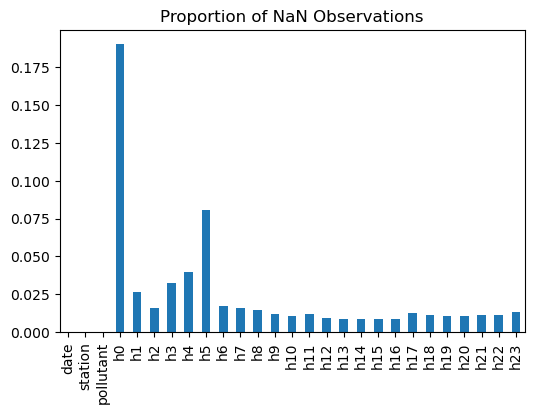

In [6]:
(full.isnull().sum() / (full.notnull().sum() + full.isnull().sum())).plot(kind='bar', title='Proportion of NaN Observations')

Most `NaN` observations happen at midnight, which may indicate that stations are turned off every day at midnight; at this point this is just a conjecture, and more work needs to be done before we have a definitive answer.

There is a considerable range of parameters for which we have observations, though it is important to note that most stations don't measure all of them (in fact, most measure no more than five or six of them):

| Parameter (Acronym) | Description |
|:-------------------:|:-----------:|
|BEN    |Benzene|
|CO     |Carbon Monoxide|
|DV     |Wind Direction|
|DVG    |Global Wind Speed|
|ERT    |Total Reduced Sulfur (i.e., sulfide, thiosulfate, inorganic sulfur)|
|MP10   |Inhalable Coarse Particles|
|MP2.5  |Fine Particles|
|NO     |Nitric Oxide|
|NO2    |Nitrogen Dioxide|
|NOx    |Nitrogen Oxides|
|O3     |Ozone|
|PRESS  |Atmospheric Pressure|
|RADG   |Global Solar Radiation|
|RADUV  |Ultraviolet Radiation|
|SIGMA  |Std. Dev. of Wind Speed|
|SO2    |Sulfur Dioxide|
|TEMP   |Air Temperature|
|TOL    |Toluene|
|UR     |Relative Humidity|
|VV     |Wind Speed|


In [9]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [10]:
def tsplot(station='Pinheiros', pollutant='O3'):

    full_s = full.copy(deep=False)

    full_s = full_s[full_s.pollutant == pollutant]
    full_s[f'{pollutant}'] = full_s.mean(axis=1)
    full_s = full_s[['date', 'station', 'pollutant', f'{pollutant}']]
    full_s.set_index(pd.to_datetime(full_s.date, format='%Y-%m-%d'), inplace=True)
    full_s = full_s[full_s.station == station]

    return full_s.groupby(full_s.index).mean().plot(figsize=(15, 5), kind='line')

In [15]:
interact(tsplot, station=full.station.unique(), pollutant=full.pollutant.unique())

interactive(children=(Dropdown(description='station', index=61, options=('Presidente Prudente', 'Osasco', 'Ibi…

<function __main__.tsplot(station='Pinheiros', pollutant='O3')>